In [1]:
import json
import requests
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.metrics import Accuracy

2021-10-01 23:23:52.678142: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-01 23:23:52.678161: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
r = requests.get("http://192.168.15.131:5000/api/v0.1/selfbalancing/mongodb/1000")
if r.status_code == 200:
    register = json.loads(r.content)

In [3]:
df = pd.read_json(json.dumps(register))

In [4]:
df.head()

,gyroy,kalangley,kd,ki,kp,pitch,res
0,137,3.51,1,5,22,5.20,-65.72
1,-534,3.28,1,5,22,-0.50,-64.91
2,-3555,2.96,1,5,22,6.20,-60.28
3,-3469,2.47,1,5,22,1.82,-49.52
4,-4376,2.04,1,5,22,5.33,-37.70


In [5]:
# df.gyroy = df.gyroy.astype(float)
# df.kalangley = df.kalangley.astype(float)
# df.kd = df.kd.astype(float)
# df.ki = df.ki.astype(float)
# df.kp = df.kp.astype(float)
# df.pitch = df.pitch.astype(float)
# df.res = df.res.astype(float)

In [6]:
df.shape

(1000, 7)

In [7]:
df.head()

,gyroy,kalangley,kd,ki,kp,pitch,res
0,137,3.51,1,5,22,5.20,-65.72
1,-534,3.28,1,5,22,-0.50,-64.91
2,-3555,2.96,1,5,22,6.20,-60.28
3,-3469,2.47,1,5,22,1.82,-49.52
4,-4376,2.04,1,5,22,5.33,-37.70


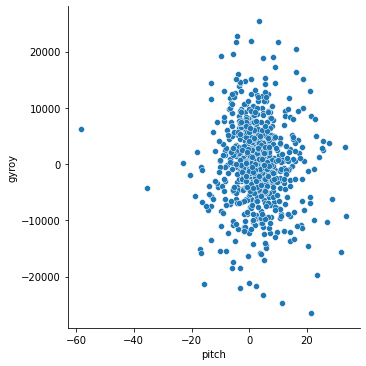

In [8]:
sns.relplot(x = "pitch", y = "gyroy", data = df)

In [9]:
for x in range(len(df)):
    if -10000 < df["gyroy"][x] < 10000:
        df.loc[x, "up"] = 1
    else:
        df.loc[x, "up"] = 0

In [10]:
df.sample(10)

,gyroy,kalangley,kd,ki,kp,pitch,res,up
28,-6,2.36,1,5,22,-2.11,0.16,1.0
713,20488,1.83,1,5,22,16.35,-0.90,0.0
302,1163,2.30,1,5,22,4.03,17.08,1.0
534,-2914,2.01,1,5,22,10.54,-0.20,1.0
890,2,3.84,1,5,22,2.81,54.86,1.0
976,-13337,2.29,1,5,22,15.56,-66.95,0.0
600,8781,3.25,1,5,22,1.42,23.37,1.0
537,951,2.91,1,5,22,4.91,-22.20,1.0
48,-394,1.23,1,5,22,5.51,32.46,1.0
732,-878,1.37,1,5,22,22.57,-52.73,1.0


In [11]:
#df.to_csv("teste.csv", index=False)

In [12]:
features = df.iloc[:,0:7]
target = df.iloc[:,7]

In [13]:
target

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
995    1.0
996    1.0
997    1.0
998    1.0
999    1.0
Name: up, Length: 1000, dtype: float64

In [14]:
features

,gyroy,kalangley,kd,ki,kp,pitch,res
0,137,3.51,1,5,22,5.20,-65.72
1,-534,3.28,1,5,22,-0.50,-64.91
2,-3555,2.96,1,5,22,6.20,-60.28
3,-3469,2.47,1,5,22,1.82,-49.52
4,-4376,2.04,1,5,22,5.33,-37.70
...,...,...,...,...,...,...,...
995,-2209,2.49,1,5,22,6.66,-56.01
996,-2033,2.07,1,5,22,-1.13,-45.02
997,-1602,2.15,1,5,22,8.17,-44.42
998,335,1.80,1,5,22,-6.79,-33.80


In [15]:
X_train, X_test, y_train, y_test = train_test_split(target, features, test_size=0.33, random_state=8)

In [16]:
X_train.shape

(670,)

In [17]:
#import tensorflow as tf

In [18]:
# modelo = Sequential([tf.keras.layers.Input(shape=(7,)),
#                     tf.keras.layers.Dense(1, activation='sigmoid')
# ])
modelo = Sequential()
modelo.add(Dense(12, input_dim=7, activation='relu'))
modelo.add(Dense(12, activation='relu'))
modelo.add(Dense(1, activation='sigmoid'))

2021-10-01 23:23:55.807945: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-01 23:23:55.808283: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-01 23:23:55.808830: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2021-10-01 23:23:55.808917: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2021-10-01 23:23:55.809249: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [19]:
#modelo.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
modelo.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [20]:
historico = modelo.fit(y_train, X_train, epochs=100)

2021-10-01 23:23:55.960721: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
21/21 [==============================] - 0s 863us/step - loss: 188.8752 - accuracy: 0.7269
Epoch 2/100
21/21 [==============================] - 0s 786us/step - loss: 92.3845 - accuracy: 0.7851
Epoch 3/100
21/21 [==============================] - 0s 891us/step - loss: 14.9973 - accuracy: 0.7134
Epoch 4/100
21/21 [==============================] - 0s 846us/step - loss: 3.4931 - accuracy: 0.7851
Epoch 5/100
21/21 [==============================] - 0s 924us/step - loss: 2.7176 - accuracy: 0.7373
Epoch 6/100
21/21 [==============================] - 0s 807us/step - loss: 1.7913 - accuracy: 0.7776
Epoch 7/100
21/21 [==============================] - 0s 850us/step - loss: 2.1061 - accuracy: 0.7537
Epoch 8/100
21/21 [==============================] - 0s 951us/step - loss: 2.2262 - accuracy: 0.7731
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 1.2509 - accuracy: 0.8030
Epoch 10/100
21/21 [==============================] - 0s 966us/step - loss: 2.1478 - accu

In [21]:
modelo.test_on_batch(y_train, X_train)
modelo.metrics_names

['loss', 'accuracy']

In [22]:
print(historico.history.keys())

dict_keys(['loss', 'accuracy'])


In [23]:
scores = modelo.evaluate(y_test, X_test)
print("\n")
print("Acuracia do modelo")
print("\n%s: %2f%%" % (modelo.metrics_names[1], scores[1]*100))

11/11 [==============================] - 0s 933us/step - loss: 1.4211 - accuracy: 0.9394


Acuracia do modelo

accuracy: 93.939394%


In [24]:
prediction = modelo.predict([[-74, -64, -51, -19, -11, 11, 23]])
print("prediction shape:", prediction)

prediction shape: [[2.8299354e-07]]


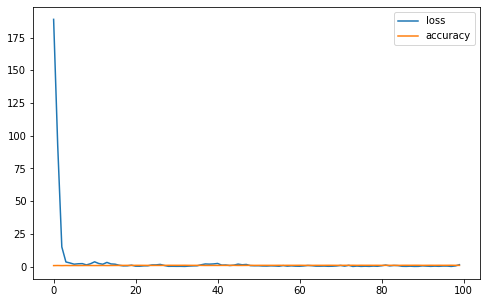

In [25]:
from matplotlib import pyplot as plt
pd.DataFrame(historico.history).plot(figsize=(8,5))
plt.show()

In [27]:
from random import sample
from random import randint

aux = 0
while (1):
  #sorteados = sample(range(-100, 100), 7)
  #print(sorteados)
  #sorteio = sample(range(-100, 100), 1)
  kd = randint(0, 100)
  ki = randint(0, 100)
  kp = randint(0, 100)

  valor = [-5000, 2, kd, ki, kp, 0, 20]
  #print(valor)

  prediction = modelo.predict([valor])*100
  # for i in prediction:
  #   #print("prediction:", i)
  #   for x in i:
  #     print("prediction:", x)

  if prediction >= 0.5:
    print("tentativa: ", aux)
    print("numeros: ", valor)
    print("prediction shape: ", prediction)
  aux += 1

tentativa:  0
numeros:  [-5000, 2, 63, 6, 10, 0, 20]
prediction shape:  [[100.]]
tentativa:  1
numeros:  [-5000, 2, 18, 69, 35, 0, 20]
prediction shape:  [[100.]]
tentativa:  2
numeros:  [-5000, 2, 83, 0, 16, 0, 20]
prediction shape:  [[100.]]
tentativa:  3
numeros:  [-5000, 2, 91, 63, 61, 0, 20]
prediction shape:  [[100.]]
tentativa:  4
numeros:  [-5000, 2, 1, 38, 93, 0, 20]
prediction shape:  [[100.]]
tentativa:  5
numeros:  [-5000, 2, 48, 40, 53, 0, 20]
prediction shape:  [[100.]]
tentativa:  6
numeros:  [-5000, 2, 67, 80, 50, 0, 20]
prediction shape:  [[100.]]
tentativa:  7
numeros:  [-5000, 2, 80, 78, 53, 0, 20]
prediction shape:  [[100.]]
tentativa:  8
numeros:  [-5000, 2, 73, 61, 89, 0, 20]
prediction shape:  [[100.]]
tentativa:  9
numeros:  [-5000, 2, 18, 6, 15, 0, 20]
prediction shape:  [[100.]]
tentativa:  10
numeros:  [-5000, 2, 34, 41, 64, 0, 20]
prediction shape:  [[100.]]
tentativa:  11
numeros:  [-5000, 2, 9, 71, 23, 0, 20]
prediction shape:  [[100.]]
tentativa:  12
nume

KeyboardInterrupt: 